In [20]:
import joblib
import os
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

In [315]:
results = defaultdict(dict)

In [348]:
def mse(y, t):
    return np.linalg.norm(y-t, ord=2) / np.linalg.norm(t, ord=2) #np.size(y)

def get_results(dirpath, targets):
    mse_alphas = []
    mse_phi = []
    
    i = 0
    while True:
        path = f'{dirpath}/{str(i)}/polya-mixture.joblib'
        if os.path.exists(path):
            d = joblib.load(f'{dirpath}/{str(i)}/polya-mixture.joblib')
            y_a = d['alphas'].numpy()            
            y_p = d['phi'].numpy()
            t_a = np.array(targets['alphas']).reshape(y_a.shape)
            t_p = np.array(targets['phi']).reshape(y_p.shape)

            if False: # instead of this, just reorder targets
                # Order according to increasing phi value
                y_sorting_indices = np.argsort(y_p)
                t_sorting_indices = np.argsort(t_p)
                y_a = y_a[y_sorting_indices, :] if y_a.ndim == 2 else y_a[y_sorting_indices]
                t_a = t_a[t_sorting_indices, :] if t_a.ndim == 2 else t_a[t_sorting_indices]
                y_p = y_p[y_sorting_indices]
                t_p = t_p[t_sorting_indices]
            
            mse_alphas.append(mse(y_a, t_a))
            mse_phi.append(mse(y_p, t_p))
            i += 1
        else:
            break
    print('y_a', y_a)
    print('t_a', t_a)
    print('y_p', y_p)
    print('t_p', t_p)

    return mse_alphas, mse_phi

In [349]:
dirpath = '../mle_params/cifar10_1_mixture_easy_iteration_models'
targets = {'phi': 1.0, 'alphas': [1.0]*10}

a, p = get_results(dirpath, targets)
results['Low heterogeneity - 1 mixture component'] = {'alphas': a, 'phi': p}

y_a [[0.9830888  0.9836113  0.949971   1.0266845  0.98187065 0.93955207
  1.0021306  1.0542753  0.98674315 0.9831437 ]]
t_a [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y_p [1.]
t_p [1.]


In [350]:
dirpath = '../mle_params/cifar10_2_mixture_easy_iteration_models'
targets = {'phi': [0.5, 0.5], 'alphas': [[0.8]*10, [1.0]*10]}

a, p = get_results(dirpath, targets)
results['Low heterogeneity - 2 mixture components'] = {'alphas': a, 'phi': p}

y_a [[0.8949972  0.8292597  0.8842902  0.8516318  0.85689884 0.8867707
  0.8828852  0.8397239  0.8045578  0.89611095]
 [0.9422966  0.91131413 0.9135793  0.90758824 0.94545484 0.94940096
  0.9347347  0.91238105 0.90499514 0.96489817]]
t_a [[0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]
y_p [0.38324493 0.6167551 ]
t_p [0.5 0.5]


In [351]:
dirpath = '../mle_params/cifar10_3_mixture_easy_iteration_models'
targets = {'phi': [0.334, 0.333, 0.333], 'alphas': [[1.1]*10, [0.8]*10, [1.0]*10]}

a, p = get_results(dirpath, targets)
results['Low heterogeneity - 3 mixture components'] = {'alphas': a, 'phi': p}

y_a [[1.066593   1.0640484  0.99796337 0.99338555 1.0719604  1.0735439
  1.0606164  0.99636525 1.0607691  1.0325032 ]
 [0.8113324  0.7412155  0.7421719  0.76742476 0.7978137  0.80386424
  0.8376431  0.7696238  0.78532445 0.78983146]
 [0.88768315 0.8750244  0.8565851  0.8092215  0.9191889  0.90774536
  0.9050219  0.8186563  0.82398546 0.86230224]]
t_a [[1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]
y_p [0.6212769  0.13670582 0.2420173 ]
t_p [0.334 0.333 0.333]


In [352]:
dirpath = '../mle_params/cifar10_1_mixture_medium_iteration_models'
targets = {'phi': 1.0, 'alphas': [0.1, 0.2, 0.6, 1.0, 2.0, 0.1, 1.0, 2.0, 0.5, 0.5]}

a, p = get_results(dirpath, targets)
results['Medium heterogeneity - 1 mixture component'] = {'alphas': a, 'phi': p}

y_a [[0.09486745 0.18039015 0.6038319  1.0086943  1.9933786  0.09489949
  0.99804974 2.0103388  0.5047902  0.501056  ]]
t_a [[0.1 0.2 0.6 1.  2.  0.1 1.  2.  0.5 0.5]]
y_p [1.]
t_p [1.]


In [353]:
dirpath = '../mle_params/cifar10_2_mixture_medium_iteration_models'
targets = {'phi': [0.4, 0.6], 'alphas': [[0.1, 0.2, 0.6, 1.0, 2.0, 0.1, 1.0, 2.0, 0.5, 0.5], [1.1, 0.1, 0.7, 0.9, 1.0, 0.2, 0.5, 1.0, 0.8, 1.5]]}

a, p = get_results(dirpath, targets)
results['Medium heterogeneity - 2 mixture components'] = {'alphas': a, 'phi': p}

y_a [[0.09601912 0.203612   0.576978   0.9885703  1.942201   0.09881581
  0.9899525  2.032183   0.52628845 0.511908  ]
 [1.1092798  0.1123076  0.6980247  0.90534943 1.0147401  0.18994084
  0.5059109  0.9570854  0.79806316 1.5191599 ]]
t_a [[0.1 0.2 0.6 1.  2.  0.1 1.  2.  0.5 0.5]
 [1.1 0.1 0.7 0.9 1.  0.2 0.5 1.  0.8 1.5]]
y_p [0.37693217 0.6230678 ]
t_p [0.4 0.6]


In [354]:
dirpath = '../mle_params/cifar10_3_mixture_medium_iteration_models'
targets = {'phi': [0.2, 0.3, 0.5], 'alphas': [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.1, 0.2, 0.6, 1.0, 2.0, 0.1, 1.0, 2.0, 0.5, 0.5], [1.1, 0.1, 0.7, 0.9, 1.0, 0.2, 0.5, 1.0, 0.8, 1.5]]}

a, p = get_results(dirpath, targets)
results['Medium heterogeneity - 3 mixture components'] = {'alphas': a, 'phi': p}

y_a [[0.51219416 0.51829547 0.47929743 0.53371894 0.50652635 0.499473
  0.47228953 0.4900735  0.4821596  0.48754203]
 [0.13210084 0.17273213 0.5936526  0.997307   1.9424596  0.10008831
  1.0737354  2.0053742  0.52007437 0.49917984]
 [1.039937   0.09993631 0.75087065 0.89299226 0.9463883  0.17576067
  0.5173786  1.0259137  0.78837794 1.5182108 ]]
t_a [[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.1 0.2 0.6 1.  2.  0.1 1.  2.  0.5 0.5]
 [1.1 0.1 0.7 0.9 1.  0.2 0.5 1.  0.8 1.5]]
y_p [0.20531842 0.3174111  0.47727048]
t_p [0.2 0.3 0.5]


In [355]:
dirpath = '../mle_params/cifar10_1_mixture_hard_iteration_models'
targets = {'phi': 1.0, 'alphas': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}

a, p = get_results(dirpath, targets)
results['High heterogeneity - 1 mixture component'] = {'alphas': a, 'phi': p}

y_a [[0.10798693 0.08479945 0.09277119 0.10356809 0.0958684  0.09630357
  0.08943666 0.10059562 0.10332205 0.09725104]]
t_a [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
y_p [1.]
t_p [1.]


In [356]:
dirpath = '../mle_params/cifar10_2_mixture_hard_iteration_models'
targets = {'phi': [0.1, 0.9], 'alphas': [[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]]}

a, p = get_results(dirpath, targets)
results['High heterogeneity - 2 mixture components'] = {'alphas': a, 'phi': p}

y_a [[0.1807397  0.17358837 0.1946859  0.18628934 0.19083592 0.17438039
  0.18713334 0.18131252 0.18108001 0.19267383]
 [0.34003973 0.34449705 0.35007524 0.35807556 0.36345354 0.3291148
  0.33449852 0.3500933  0.3563593  0.3211949 ]]
t_a [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]]
y_p [0.37103534 0.6289647 ]
t_p [0.1 0.9]


In [357]:
dirpath = '../mle_params/cifar10_3_mixture_hard_iteration_models'
targets = {'phi': [0.8, 0.05, 0.15], 'alphas': [[1.1, 0.1, 0.7, 0.9, 1.0, 0.2, 0.5, 1.0, 0.8, 1.5], [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]]}

a, p = get_results(dirpath, targets)
results['High heterogeneity - 3 mixture components'] = {'alphas': a, 'phi': p}

y_a [[1.1966388  0.08676551 0.72974104 0.9376729  1.0623652  0.20623356
  0.51617557 1.0524946  0.8251987  1.5541486 ]
 [0.24933581 0.2668144  0.27757534 0.25659457 0.2190239  0.25226066
  0.25375283 0.26445332 0.2606129  0.21766934]
 [1.0591303  0.08694185 0.626189   0.8334799  0.9366921  0.16620831
  0.47646916 0.944582   0.7469978  1.4314592 ]]
t_a [[1.1 0.1 0.7 0.9 1.  0.2 0.5 1.  0.8 1.5]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]]
y_p [0.5383507  0.19458508 0.2670642 ]
t_p [0.8  0.05 0.15]


Text(0.5, 1.0, 'Normalised MSE of alpha parameters during training\non artificially federated CIFAR-10\nunder different target heterogeneity conditions\nand using different numbers of mixture components')

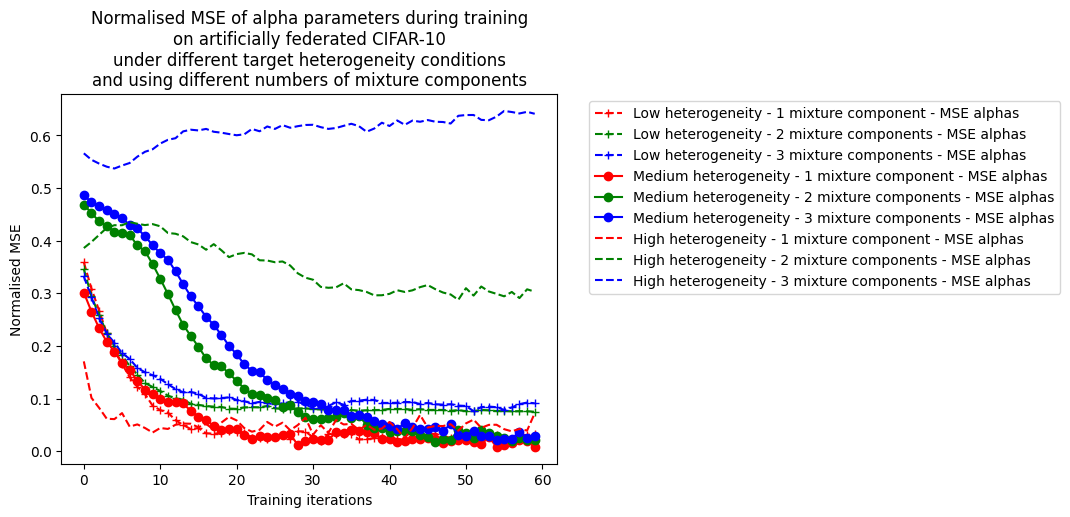

In [358]:
for k in results.keys():
    if 'Low' in k:
        line = '--+'
    elif 'Medium' in k:
        line = '-o'
    else:
        line = '--'

    if '1' in k:
        colour = 'red'
    elif '2' in k:
        colour = 'green'
    elif '3' in k:
        colour = 'blue'
    plt.plot(results[k]['alphas'], line, color=colour, label=k+' - MSE alphas')


    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Training iterations')
plt.ylabel('Normalised MSE')
plt.title('Normalised MSE of alpha parameters during training\non artificially federated CIFAR-10\nunder different target heterogeneity conditions\nand using different numbers of mixture components')

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Normalised MSE of phi parameters during training\non artificially federated CIFAR-10\nunder different target heterogeneity conditions\nand using different numbers of mixture components')

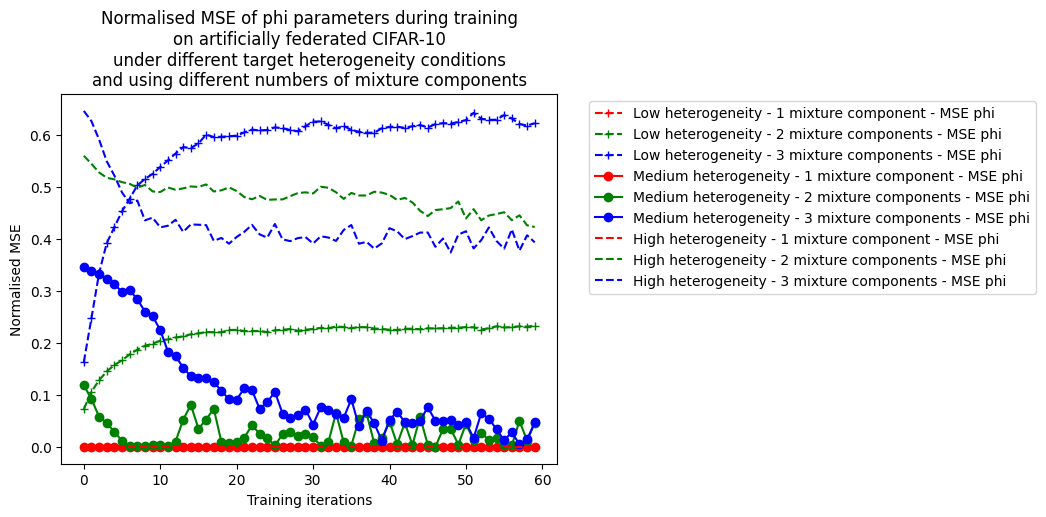

In [359]:
for k in results.keys():
    if 'Low' in k:
        line = '--+'
    elif 'Medium' in k:
        line = '-o'
    else:
        line = '--'

    if '1' in k:
        colour = 'red'
        print(results[k]['phi'])
    elif '2' in k:
        colour = 'green'
    elif '3' in k:
        colour = 'blue'
    plt.plot(results[k]['phi'], line, color=colour, label=k+' - MSE phi')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Training iterations')
plt.ylabel('Normalised MSE')
plt.title('Normalised MSE of phi parameters during training\non artificially federated CIFAR-10\nunder different target heterogeneity conditions\nand using different numbers of mixture components')
